In [1]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
from os import chdir

In [2]:
chdir('C:/Users/Shuya C/Desktop/depaul/DSC478/finalproject')

In [3]:
df_train=pd.read_csv('train.csv',sep=',')

In [6]:
print("The data file shape ")
print(df_train.shape)

The data file shape 
(1804874, 45)


In [5]:
df=df_train.copy()

In [7]:
df_train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


"show percentage of missing value of each column in train file "

In [8]:
print(df.isnull().sum()/len(df)*100)  

id                                      0.000000
target                                  0.000000
comment_text                            0.000000
severe_toxicity                         0.000000
obscene                                 0.000000
identity_attack                         0.000000
insult                                  0.000000
threat                                  0.000000
asian                                  77.553558
atheist                                77.553558
bisexual                               77.553558
black                                  77.553558
buddhist                               77.553558
christian                              77.553558
female                                 77.553558
heterosexual                           77.553558
hindu                                  77.553558
homosexual_gay_or_lesbian              77.553558
intellectual_or_learning_disability    77.553558
jewish                                 77.553558
latino              

In [9]:
print("read the test file and get its shape")
test_df=pd.read_csv('test.csv',sep=',')
print(test_df.shape)
test_df.head()

read the test file and get its shape
(97320, 2)


,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...


# 1.Cleaning Text data with TfidfVectorizer

reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorize = TfidfVectorizer()

In [12]:
x = Vectorize.fit_transform(df_train['comment_text'])
print(x.shape)
x

(1804874, 318304)


<1804874x318304 sparse matrix of type '<class 'numpy.float64'>'
	with 69537302 stored elements in Compressed Sparse Row format>

In [13]:
y = np.where(df_train['target'] >= 0.5, 1, 0)
print(y.shape)
y

(1804874,)


array([0, 0, 0, ..., 0, 1, 0])

In [21]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  

# train test split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

In [23]:
test_x = Vectorize.transform(test_df['comment_text'])
test_x

<97320x318304 sparse matrix of type '<class 'numpy.float64'>'
	with 3758665 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2.Logistic Regression algorithm

In [29]:
logist_r = LogisticRegression(random_state=42,solver='sag', max_iter=1000, n_jobs=-1)
clf=logist_r.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [30]:
cv_accuracy = cross_val_score(logist_r, x, y, cv=5,scoring = 'roc_auc')
print(cv_accuracy)

[0.94852595 0.94707324 0.94872224 0.94681234 0.94668067]


In [31]:
print('average accuracy of 5 cross validation: ',cv_accuracy.mean())

average accuracy of 5 cross validation:  0.9475628881034062


In [32]:
#Probability estimates. 
test_pred=logist_r.predict_proba(test_x)
test_pred

array([[0.96449908, 0.03550092],
       [0.98172065, 0.01827935],
       [0.98357154, 0.01642846],
       ...,
       [0.97687121, 0.02312879],
       [0.7498786 , 0.2501214 ],
       [0.96814211, 0.03185789]])

In [33]:
subm_df=pd.read_csv('sample_submission.csv',sep=',')
print(subm_df.shape)
subm_df.head()

(97320, 2)


,id,prediction
0,7000000,0.0
1,7000001,0.0
2,7000002,0.0
3,7000003,0.0
4,7000004,0.0


In [39]:
pred=test_pred[:,-1]
pred

array([0.03550092, 0.01827935, 0.01642846, ..., 0.02312879, 0.2501214 ,
       0.03185789])

In [49]:
subm_df['prediction'] = pred
subm_df.to_csv('submission.csv', index=False)

In [64]:
acc=accuracy_score(y_test, y_pred)
print('accuracy score: ',acc)

accuracy score:  0.9472916698986523


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    415087
           1       0.80      0.46      0.58     36132

   micro avg       0.95      0.95      0.95    451219
   macro avg       0.88      0.72      0.78    451219
weighted avg       0.94      0.95      0.94    451219



## Compute confusion matrix

reference:https://scikit-learn.org/0.15/auto_examples/plot_confusion_matrix.html

In [66]:
import pylab as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[410827   4260]
 [ 19523  16609]]


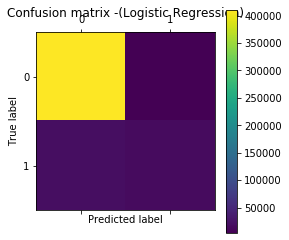

In [67]:
# Show confusion matrix 
plt.matshow(cm)
plt.title('Confusion matrix -(Logistic Regression)')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [93]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thr = roc_curve(y_test, logist_r.predict_proba(x_test)[:,1])
auc = auc(fpr, tpr)

In [109]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='red',  label="ROC curve (area = %0.4f)" % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

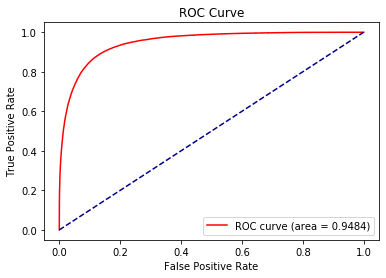

In [110]:
plot_roc_curve(fpr, tpr)